### Dynamic visualisations

Finally, let's move beyond 3D visualisations, and add a "time" dimension.

Designing your plots so that they are dynamic, rather than static, is a powerful tool. A dynamic plot can be one which updates itself over time, or one that can be updated/changed by user interaction.

Learning to create dynamic plots can let you create animated visualisations, interactive visualisations, and even entire interactive visualisation dashboards. Any of these can be amazing for exploratory or explanatory data visualisation. 

As you might expect, there are a vast breadth of approaches to this topic. 

We only have time to scratch the surface of this topic. So, we are just going to do a basic animated visualisation, and a basic interactive visualisation. 

In each case, we'll (by necessity), show just a single approach to animated/interactive visualisations. There are many, many more, and some applications/use cases will suit different methods. 

On Friday (or at the end of this class, if there's time), I'll talk more about useful tools for dynamic and interactive visualisations, and show some nice examples. 

### This "notebook" takes place in Pycharm.

As was the case for working in 3D, it is possible to create dynamic visualisations in Jupyter, but it is often more of a pain in the neck than it is worth. Below, we'll talk through the code, but you will likely find it easiest to run the scripts in Pycharm, an alternative IDE of your choice, or directly in a Python shell.

Make a new projec

### Animated visualisations

We can animate our visualisations in a number of ways, which essentially all boil down to "adding to, redrawing, or in any other sense *changing*" a figure object that is already being displayed. 

The most straightforward way to do this is using Matplotlib's **interactive mode**.

This mode allows us to create a figure and display the figure in a fairly standard way; but also allows for later sections of the code to change the figure object, and for us to push these changes *to* the displayed figure object by redrawing it. 

To use this approach, we first need to turn on interactive mode. Once we've imported ``matplotlib.pyplot as pl``, this is as simple as:

``pl.ion()``

ie, **I**nteractive mode **ON**

When we are ready for our figure to be displayed for the first time, we'd normally call ``pl.show()``. However, ``pl.show()`` will (normally) stop any subsequent code from running; the code is idle while the figure is displayed to the user, and only proceeds once the figure is closed.

When we work in interactive mode, we use the alternative ``pl.draw()``. This draws (or re-draws) the figure, but does not stop the rest of the code. 

So, we can draw one frame of our animation, and then (without the user having to do anything - no need, for example, to close the plot window), the code will proceed. This subsequent code can update the same figure object, and then (when we're ready), we can call pl.draw() again to update the figure contents.

Let's look at an example, and animate Mlebourne's historical urban development using our familiar buildings dataset.

### Exercise One

* Try to run the code: ``animate_example.py`` in Pycharm.
* Ideally, you would first create a new project, and set up your 'plots', 'data' and 'scripts' directories as usual.
    * Then, put your .csv file in the data directory, and your .py script in the scripts directory.
    * If you are using a different directory setup, you will need to adapt the file paths in the code accordingly.
* Try turning off the x and y range auto-setting. What happens?
* Try moving around the order of the plotting and pl.draw() statements. What happens?
* Try changing the frame rate (plt.pause() wait time, in seconds
* Comment out the command pl.clf(); what happens?

The code is copied here for your reference:

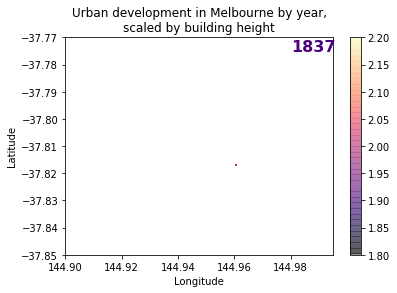

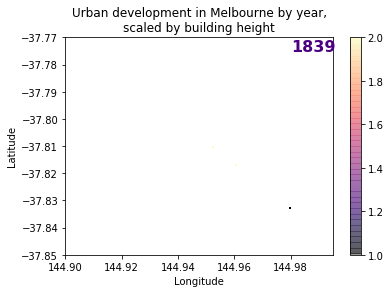

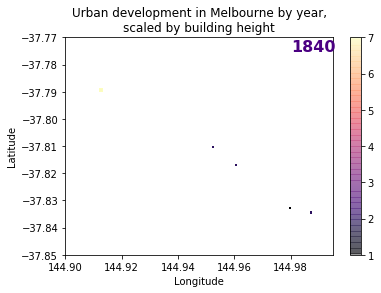

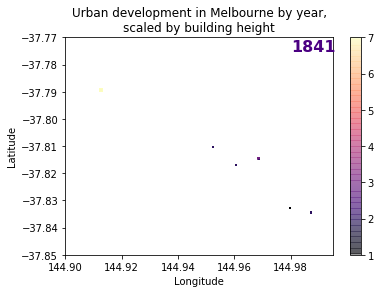

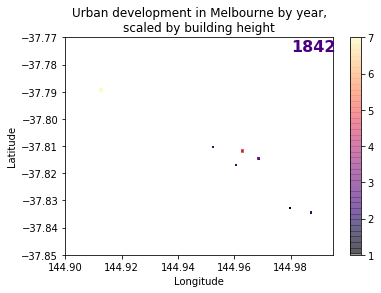

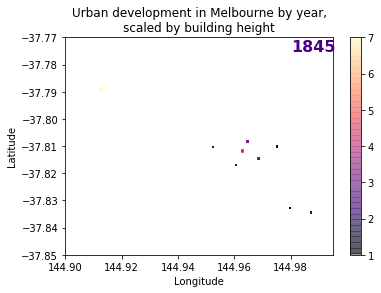

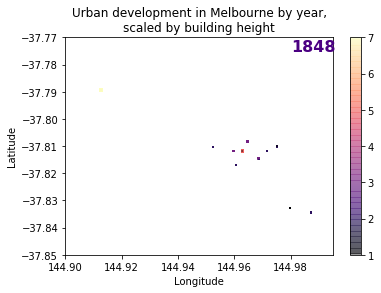

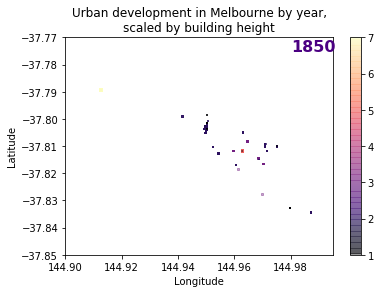

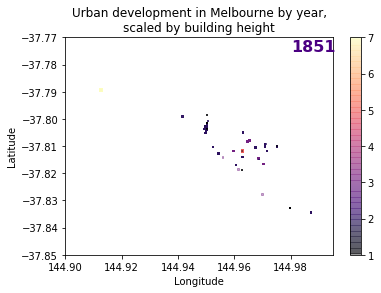

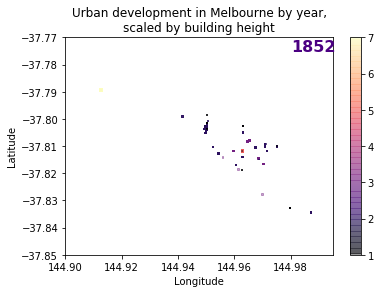

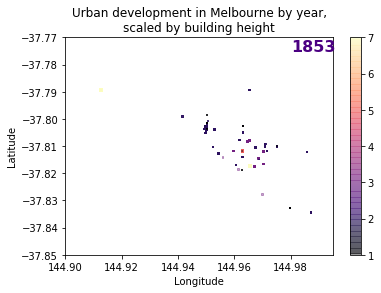

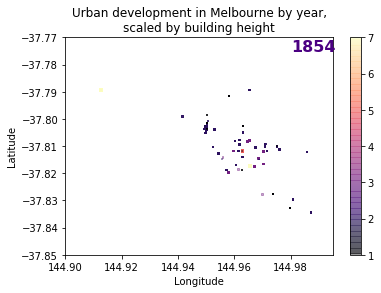

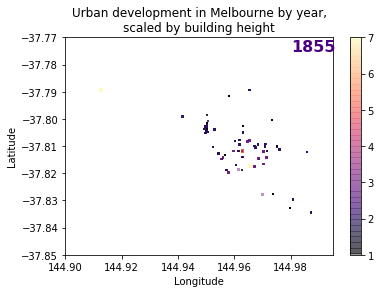

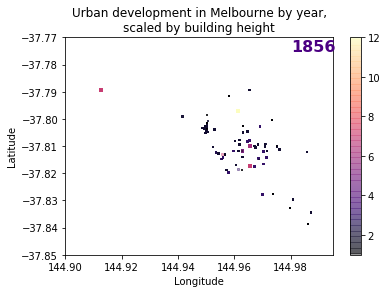

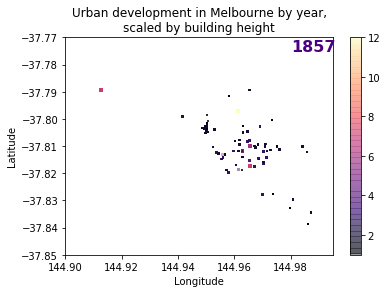

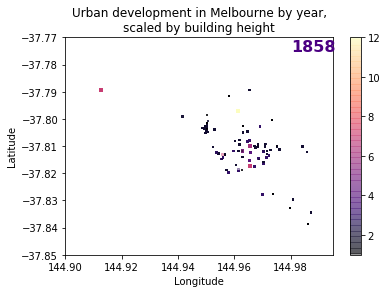

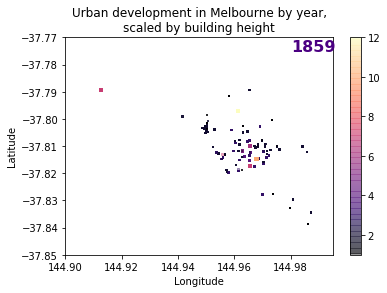

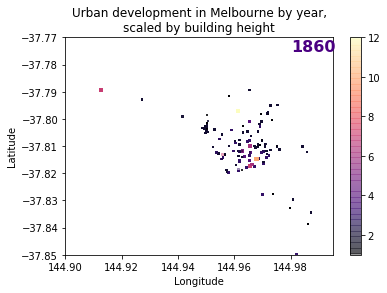

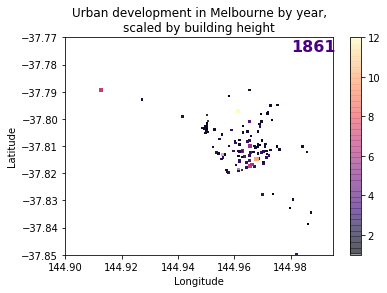

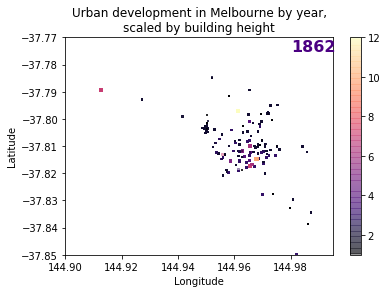

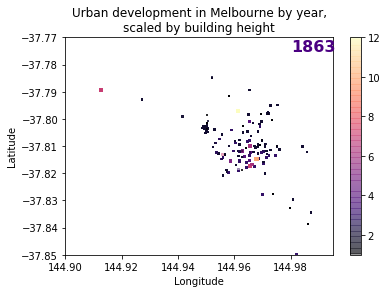

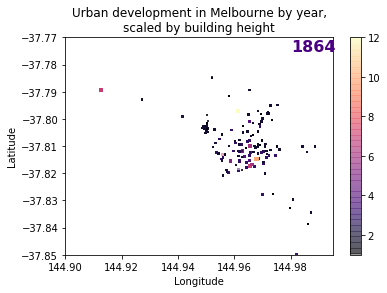

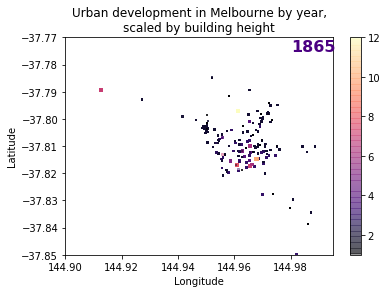

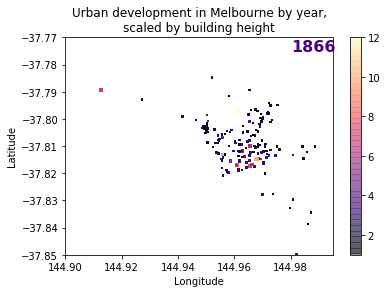

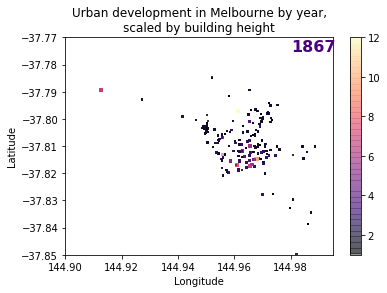

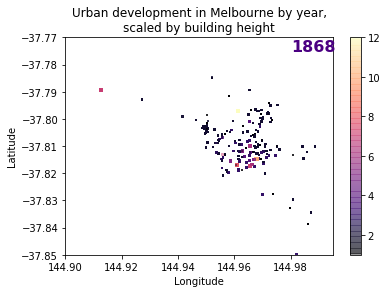

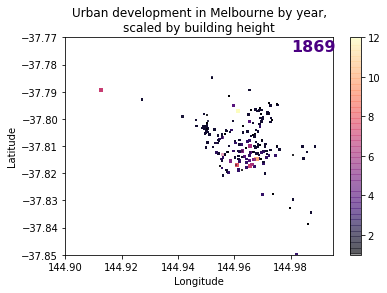

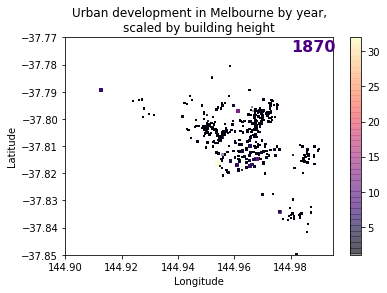

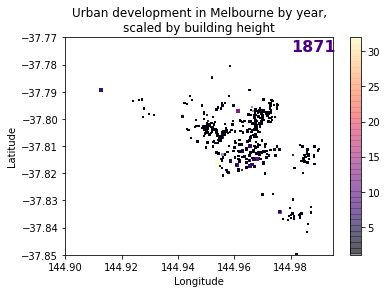

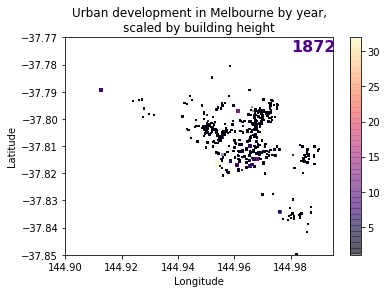

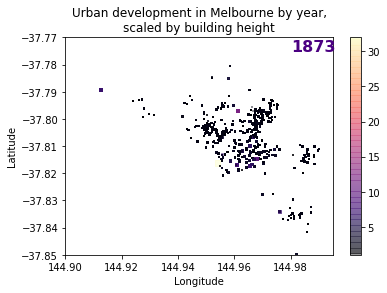

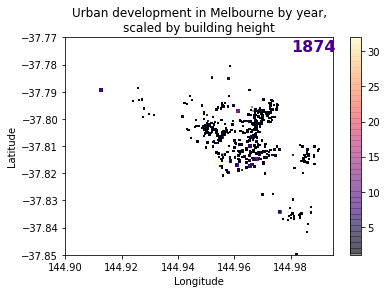

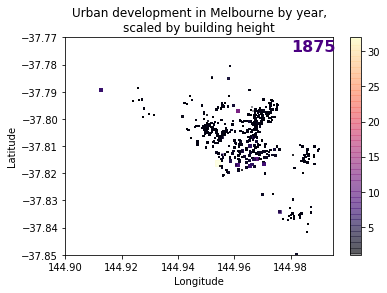

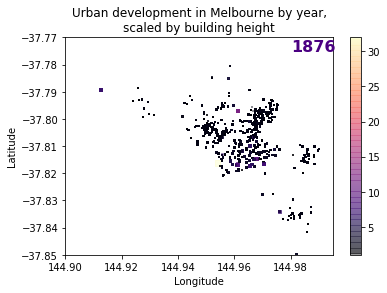

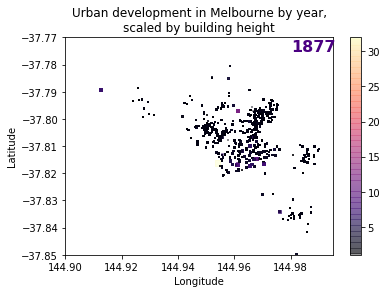

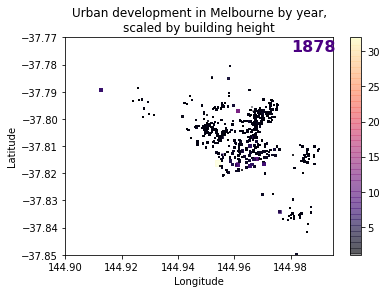

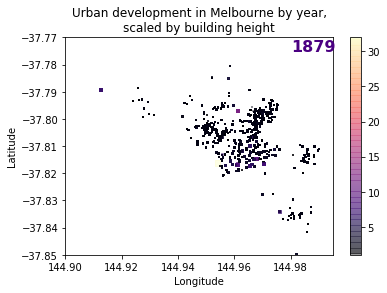

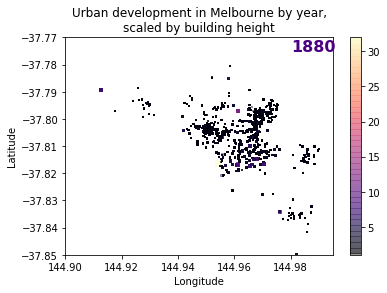

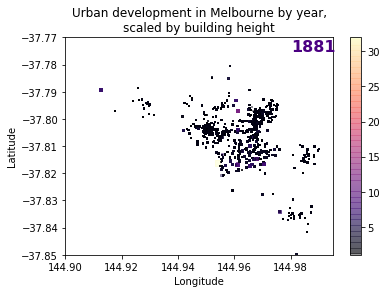

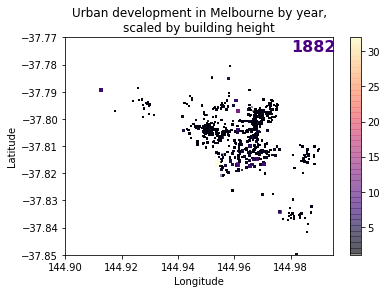

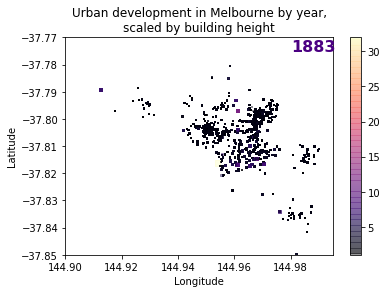

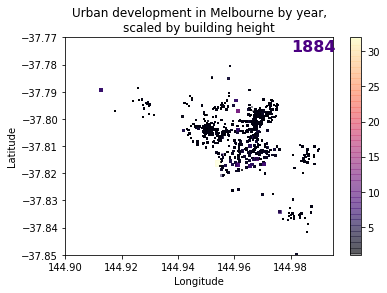

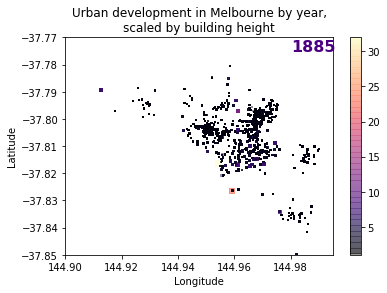

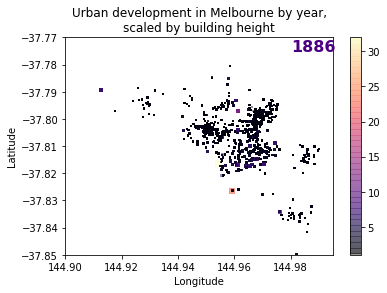

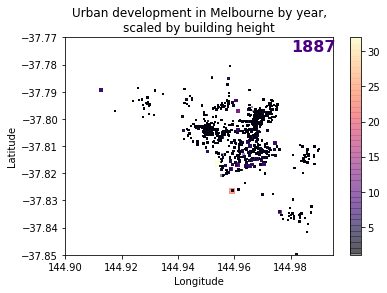

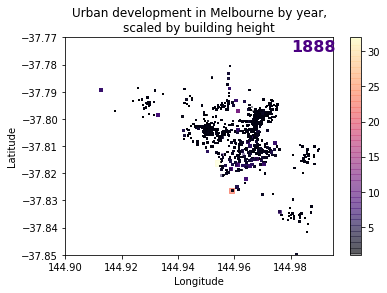

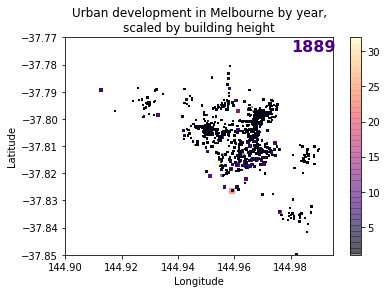

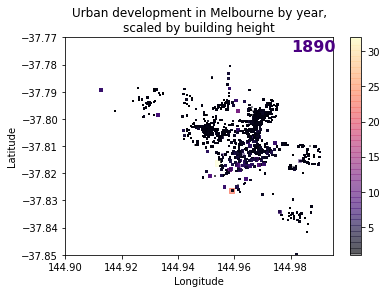

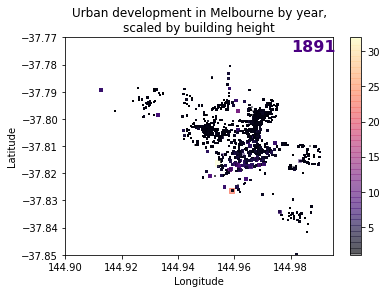

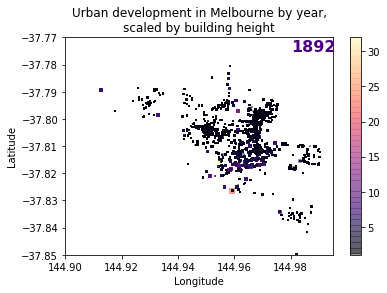

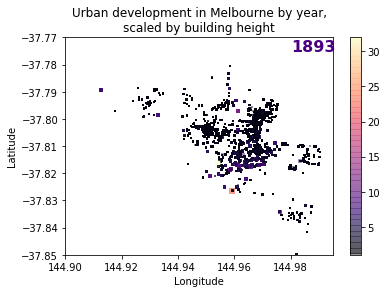

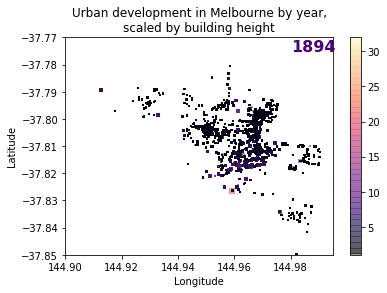

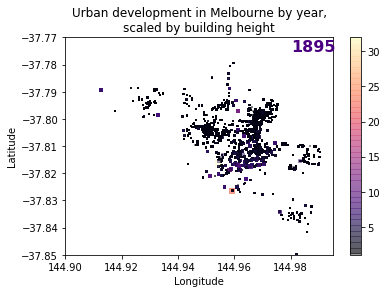

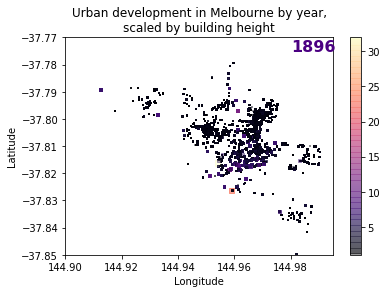

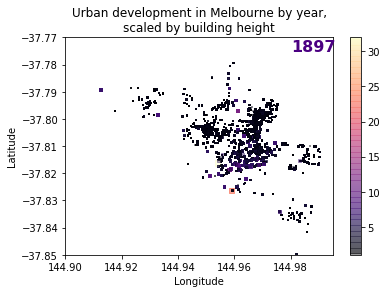

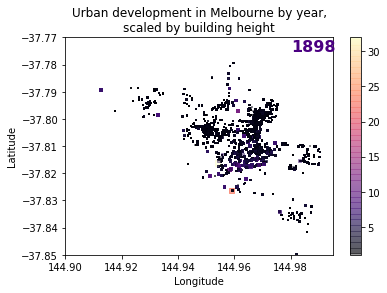

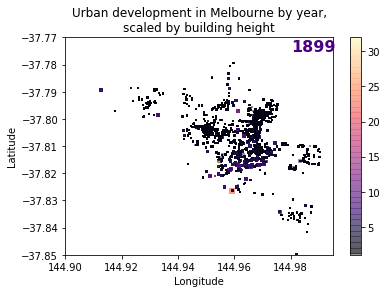

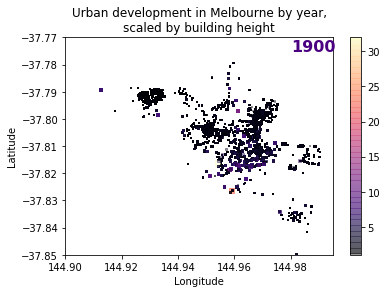

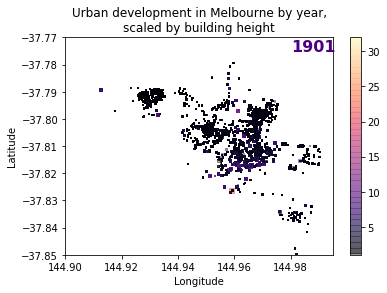

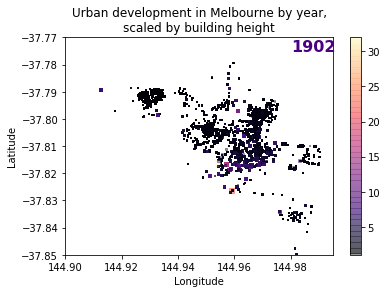

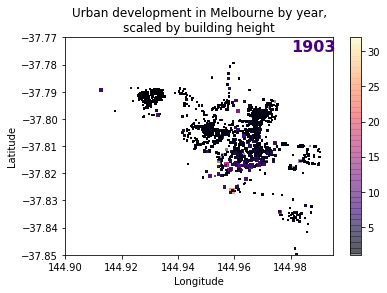

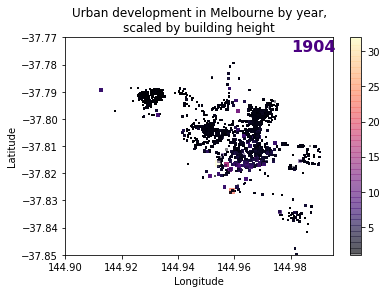

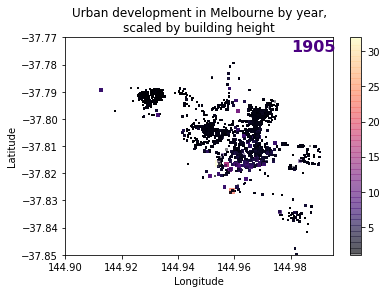

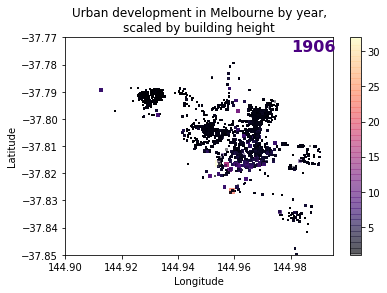

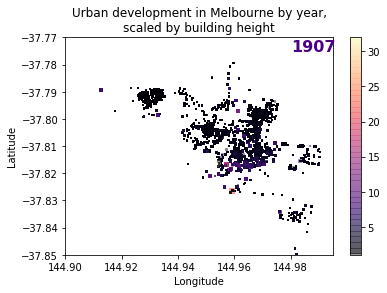

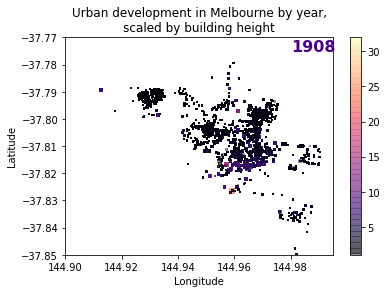

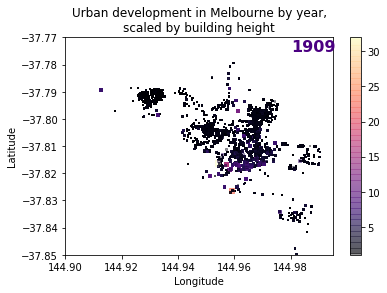

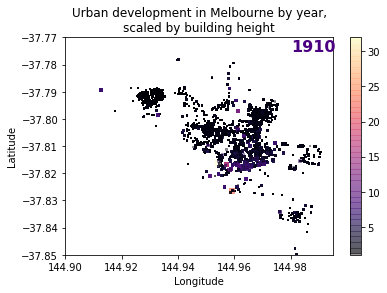

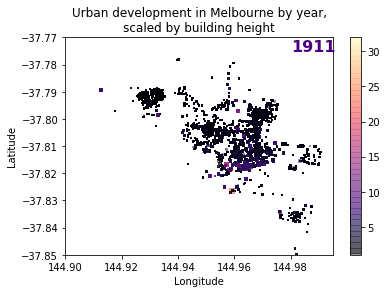

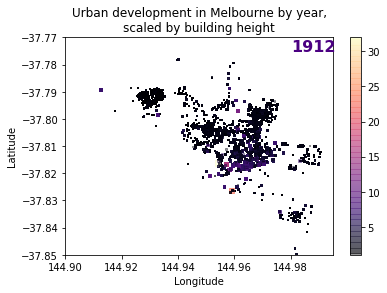

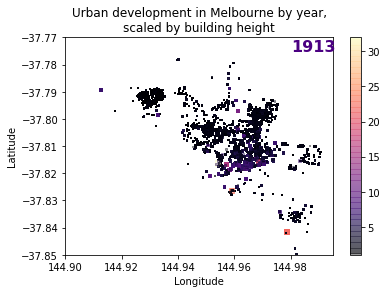

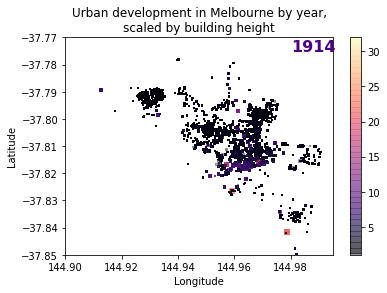

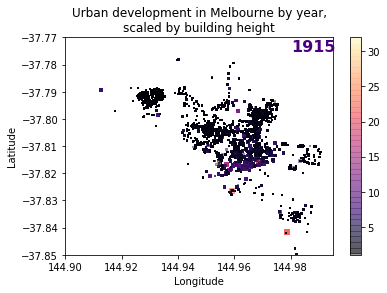

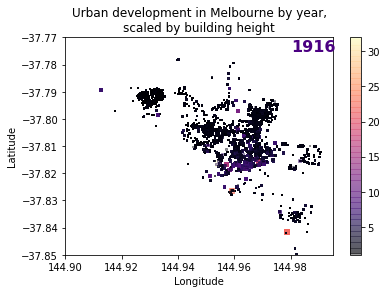

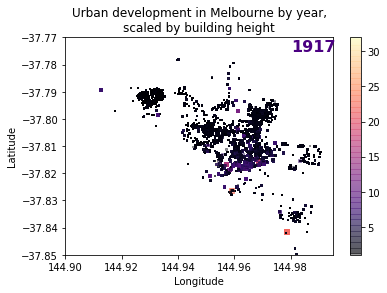

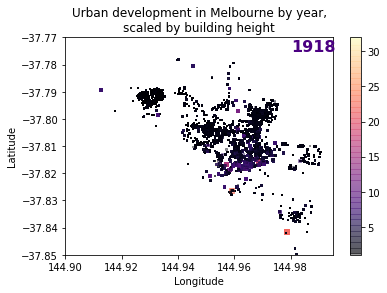

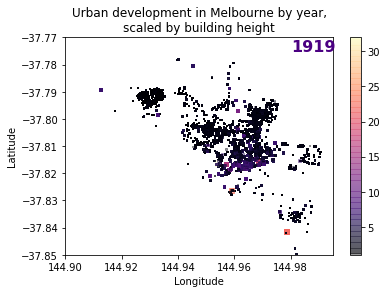

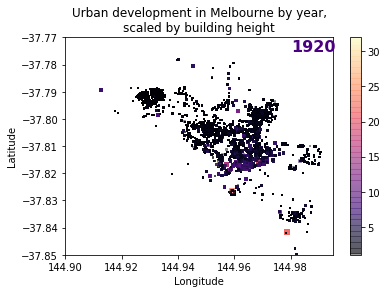

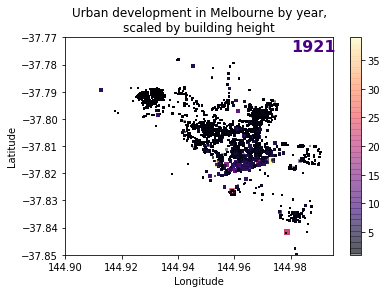

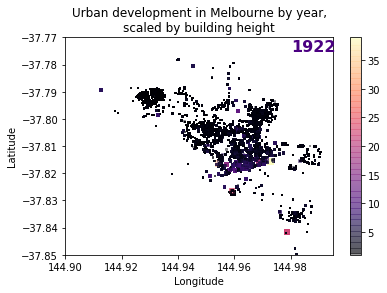

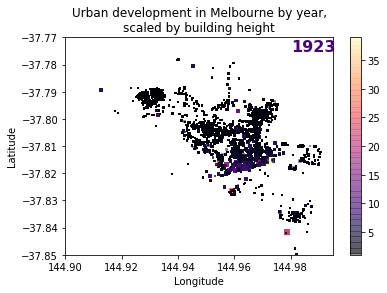

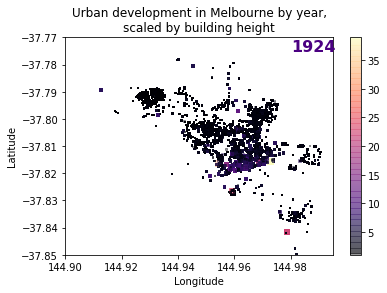

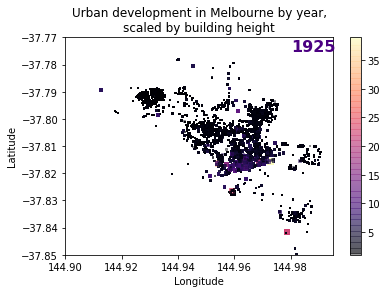

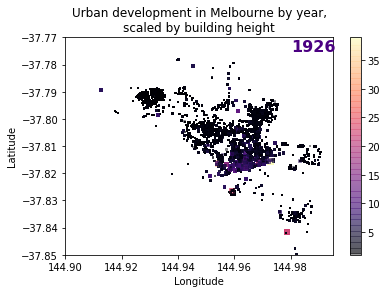

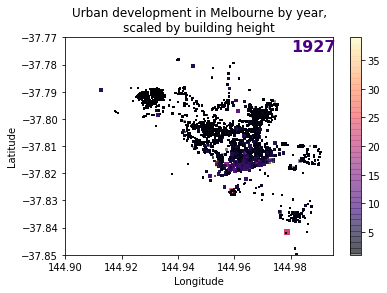

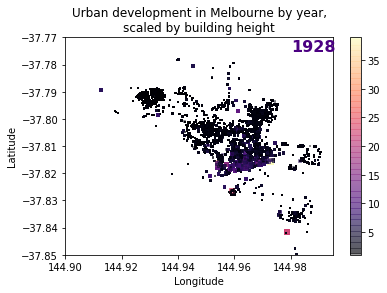

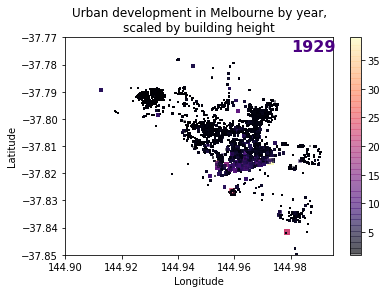

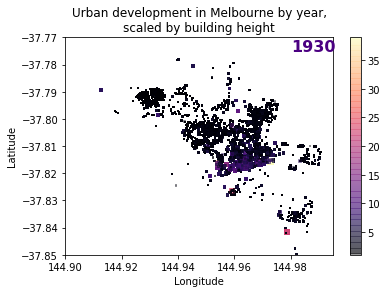

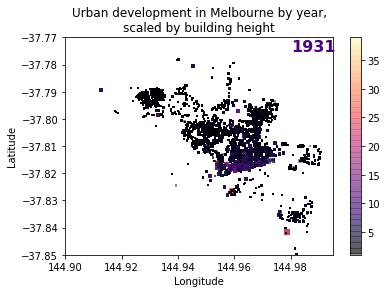

KeyboardInterrupt: 

In [3]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

# Read in our data
df = pd.read_csv('Buildings_with_name__age__size__accessibility__and_bicycle_facilities.csv')

# Filter out rows where we don't know the construction year, or where it is entered as '0'. Melbourne's not that old!
df = df.loc[(df['Construction year']!=0.0) & (~df['Construction year'].isna())]

# NB: FOR SPEED REASONS, YOU MAY ALSO WANT TO LIMIT YOURSELF TO A YEAR RANGE

#Make a sorted list of all the years we want to iterate/animate over.
years = sorted(df['Construction year'].astype(int).unique())

# TURN ON INTERACTIVE MODE
pl.ion()

# Iterate over all the years, and for each year:
for i in years:

    # Get the data you're wanting to plot: ie, the info of buildings built in Melbourne up to and including that year

    tempdata = df.loc[df['Construction year']<=i]

    # Plot the data
    pl.scatter(tempdata['x coordinate'],tempdata['y coordinate'],c=tempdata['Number of floors (above ground)'],cmap='magma',s = tempdata['Number of floors (above ground)'],alpha=0.4,marker='s')
    pl.colorbar()

    # Label the year
    pl.text(144.98,-37.775,str(i),fontweight='bold',fontsize=16,color='indigo')


    pl.title('Urban development in Melbourne by year,\nscaled by building height')
    pl.xlabel('Longitude')
    pl.ylabel('Latitude')

    # A very good idea: hold the axis ranges steady between years, at a value you know will be sensible across the whole data range.
    # Try commenting these lines out and see what happens

    pl.xlim((144.9,144.995))
    pl.ylim((-37.85,-37.77))

    # Draw the figure for this year
    pl.draw()

    #Pause for 0.5 of a second so you have time to look it over
    pl.pause(0.5)

    #Optionally, save this "frame" of the animation
    #plt.savefig('../plots/Melbourne_%s.png'%str(i))

    #Clear the figure, ready for re-drawing for the next year
    pl.clf()


### Optional (but recommended, if you have time) exercise

Use the code above as a model, and try to animate something else of your choosing.

Some suggestions (you don't have to do all of these, or in fact any of them! And you are free to make up any other idea that tickles your interest).

* Iterate over years, and redraw a histogram of building heights at each iteration
* Iterate over years, and redraw a histogram of building ages at each iteration 
* Adapt the example above using the trees dataset from last week, and make a comparable animation of how Melbourne's tree population has grown.
* Fancy-pants: remember our 3D scatter plot of building heights/locations from the last notebook? Try iterating over *azimuth* values from 0-360, and redraw the 3D scatter every time, but with view_init() changing in azimuth. You should be able to automatically animate the rotation of the 3D plot.

### Interactive Visualisations

Instead of updating our figures automatically every n seconds using a loop, we might like to update our figures when the user takes some action.

There are, again, a lot of possible ways to do this, and some amazing libraries (eg Plotly, Bokeh) which are well-adapted to doing it.

But we'll just see a simple, Matplotlib-based example for today.

Whenever we want the user to interact with our code, we need to give them a way to do so. Sometimes they can give input by typing inputs, etc. But for interactive visualisations, we want to give them a figure element which they can interact with.

These are often called 'widgets' (similar to webpage widgets). In Matplotlib, they include things like buttons to press, tools for selecting plot regions, and range sliders. Different widgets suit different types of inputs, so the widget you choose will depend on the type of interactive experience you are trying to build, and the inputs you need.

We can add widget objects to our figures by placing them on on of our axes.

The magic of widget objects is that they are able to *call a predefined function* when they receive a user interaction. We can define this function (or 'callback') to suit our own purposes. These can be as simple or as complicated as we'd like.

In this example, we'll use a slider widget to let the user select a year, and then update our plot of Melbourne's urban development to the appropriate year. 

The code is copied below for your reference.



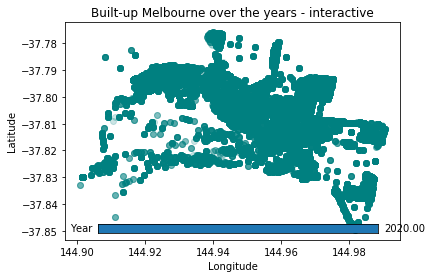

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

# As well as our usual pyplot interface, we call a special 'widgets' library from another part of matplotlib, and import its "Slider" methods
from matplotlib.widgets import Slider



# We normally define any functions we are going to use at the top of the code, so we'll do so here.

# We'll use a function to define what happens when the user interacts with the slider
# This is called whenever someone adjusts the slider value

def update(val):

    # First, we see what value the user has selected, by grabbing the 'val' attribute of the slider
    year = slider.val

    # Then, we update *the data being used for our plot points* accordingly

    scatter_points.set_xdata(df.loc[df['Construction year'] <= year]['x coordinate'])
    scatter_points.set_ydata(df.loc[df['Construction year'] <= year]['y coordinate'])


    # And redraw the figure
    fig.canvas.draw_idle()


# Now our function definitions are complete, run the main body of the code

# Grab our filtered data as usual:

df = pd.read_csv('Buildings_with_name__age__size__accessibility__and_bicycle_facilities.csv')

df = df.loc[(df['Construction year']!=0.0) & (~df['Construction year'].isna())]

years = sorted(df['Construction year'].unique())




# We set up our figure initially in pretty much the same way as ever:

fig = pl.figure()
ax = fig.add_subplot(111)


# We also create the plotted points in the same way as normal
# However, we need to save our scatter points as their own object: this object is a *collection* object (collection of plot elements ), which we'll update later based on interactions

scatter_points, = pl.plot(df['x coordinate'],df['y coordinate'],'o',color='teal',alpha=0.2)

# Otherwise, we just setup a normal plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.ticklabel_format(useOffset=False);

pl.title('Built-up Melbourne over the years - interactive')




# Then, we add a slider (or any widget), to enable interactivity

# We need to set up an axes object we can put the slider in
# The "magic numbers" below define the [bottom left coord, bottom right coord, width, height] of the axis in *figure* space units
# You can change them if you want to play with moving an axis

axcolor = 'lightblue'
ax = pl.axes([0.2, 0.15, 0.65, 0.03], facecolor=axcolor)





# We need to tell the slider object what values it's allowed to range over, and what to show as the 'default'

start_val = 2020
max_val = 2020
min_val = 1830

# Now, initialise the slider with these values, and place it on the prepared axis...

slider = Slider(ax, 'Year', min_val, max_val, valinit=start_val)



## MOST INTERESTING BIT:
# Sliders have a special attribute called on_changed, which tells them what function to call when they get a user interaction
# Here, it is our update function which we defined above

slider.on_changed(update)


# When this is all prepared, deploy the plot.
# Note that we don't need to be in interactive mode or use pl.draw(): plot updates will be handled in the update() function we've built.
pl.show()


### Exercise Two

* Try to run the code: ``interactive_example.py`` in Pycharm.
* Ideally, you would first create a new project (or reuse the one from Exercise One), and set up your 'plots', 'data' and 'scripts' directories as usual.
    * Then, put your .csv file in the data directory, and your .py script in the scripts directory.
    * If you are using a different directory setup, you will need to adapt the file paths in the code accordingly.
* Try adding something to the update statement (for example, a print statement). Can you make something else happen on the update?
* Try not adding the slider object to the plot; what happens?


### Optional exercise

Use the code above as a model, and try to animate something else of your choosing.